In [1]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive logo"/></center>
#@markdown <center><h3>Mount Gdrive to /content/drive</h3></center><br>
# MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive! 
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Mounted at /content/drive


In [2]:
import os
os.chdir("drive/MyDrive/Thesis/Keras-VGG16-places365-master/")

In [3]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 3.2 MB/s 


In [4]:
!pip install keras_preprocessing

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import urllib2
from urllib.request import urlopen
import numpy as np
from PIL import Image
from cv2 import resize
import json
from vgg16_places_365 import VGG16_Places365
import tensorflow as tf

TEST_IMAGE_URL = 'http://places2.csail.mit.edu/imgs/demo/6.jpg'


detections_path = 'scg-detections/scg-detections/'
# detections_path = 'scg-detections/test/'
# detections_path = '/home/seecs/afzaalhussain/thesis/fvqa-data/new_dataset_release/test-dir'
images_path = 'fvqa-images/'
# detected_images_path = '/home/seecs/afzaalhussain/thesis/fvqa-data/new_dataset_release/coco-fasterrcnn-detected-images'


detections_file_path = [os.path.join(detections_path, x) for x in os.listdir(detections_path)]
model = VGG16_Places365(weights='places')

543096832/543085444 [==============================] - 6s 0us/step


In [6]:



# while (num_images >= 0):
count = 0
preds = list()
for detection_file in detections_file_path:
    
    # print(detection_file)
    count+=1
    
    f = open(detection_file)
    # print(f.readlines())
    try:
        detections_json = json.load(f)
        print(count, '--', detections_json['filename'])
    except:
        print('============================================================================')
        print('error file ', detection_file)

    if 'all_detections' in detection_file:
        continue
    # print('detection_file :', detection_file)
    # print('file_name ', detections_json['filename'])
    # print('count ', count)
    # if count == 5:
    #     break
    # continue
# # image = Image.open(urlopen(TEST_IMAGE_URL))
    # image = Image.open('fvqa-images/COCO_val2014_000000001584.jpg')
    im_file = os.path.join(images_path, detections_json['filename'])
    image = Image.open(im_file)

    

    image = np.array(image, dtype=np.uint8)
    image = resize(image, (224, 224))
    



    
    predictions_to_return = 365
    
    if image.ndim == 2 :
        print(image.shape)
        image = np.stack((image,)*3, axis=-1)
        # image = tf.image.grayscale_to_rgb(image)

   

    # plt.imshow(image)
    # plt.show()

    # continue
    image = np.expand_dims(image, 0)
    preds = model.predict(image)[0]
    

    top_preds = np.argsort(preds)[::-1][0:predictions_to_return]

    # load the class label
    file_name = 'categories_places365.txt'
    if not os.access(file_name, os.W_OK):
        synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
        os.system('wget ' + synset_url)
    classes = list()
    with open(file_name) as class_file:
        for line in class_file:
            classes.append(line.strip().split(' ')[0][3:])
    classes = tuple(classes)

    indexes_ = []
    labels_ = []
    scores_ = []
    print('--SCENE CATEGORIES:')
    # output the prediction
    for i in range(0, predictions_to_return):
        # print(i+1, classes[top_preds[i]])
        labels_.append(str(classes[top_preds[i]]))
        indexes_.append(int(top_preds[i]))
        scores_.append(float(preds[i]))

    detections_json.pop('places-365-detections', None)
    # print(detections_json)
    places_365_results = {'index' : indexes_, 'labels' : labels_, 'scores' : scores_}
    detections_json['places-365-detections'] = places_365_results
    # print(detections_json)
    with open(detection_file, 'w') as f:
        json.dump(detections_json, f)


Streaming output truncated to the last 5000 lines.
--SCENE CATEGORIES:
544 -- ILSVRC2012_test_00049487.JPEG
--SCENE CATEGORIES:
545 -- COCO_val2014_000000113082.jpg
--SCENE CATEGORIES:
546 -- COCO_val2014_000000135399.jpg
--SCENE CATEGORIES:
547 -- ILSVRC2012_test_00002362.JPEG
--SCENE CATEGORIES:
548 -- COCO_val2014_000000118417.jpg
--SCENE CATEGORIES:
549 -- COCO_val2014_000000142890.jpg
--SCENE CATEGORIES:
550 -- COCO_val2014_000000140542.jpg
--SCENE CATEGORIES:
551 -- ILSVRC2012_test_00001944.JPEG
--SCENE CATEGORIES:
552 -- ILSVRC2012_test_00001890.JPEG
--SCENE CATEGORIES:
553 -- ILSVRC2012_test_00054961.JPEG
--SCENE CATEGORIES:
554 -- COCO_val2014_000000102625.jpg
--SCENE CATEGORIES:
555 -- COCO_val2014_000000016761.jpg
--SCENE CATEGORIES:
556 -- ILSVRC2012_test_00000444.JPEG
--SCENE CATEGORIES:
557 -- ILSVRC2012_test_00000487.JPEG
--SCENE CATEGORIES:
558 -- ILSVRC2012_test_00010774.JPEG
--SCENE CATEGORIES:
559 -- ILSVRC2012_test_00004811.JPEG
--SCENE CATEGORIES:
560 -- COCO_val20

In [ ]:
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

In [ ]:
len(classes)

365

In [ ]:
print(preds[preds > 0.05])

[0.35706747 0.11696178 0.20741317 0.08470547 0.06556758 0.05314303]


In [ ]:
predictions_to_return = 50
top_preds = np.argsort(preds)[::-1][0:predictions_to_return]
top_preds

array([ 22,  52,  51,  89, 124, 182,  63, 176,  26, 215,  21, 240, 244,
         3, 363,  19,  55, 236,  20, 179, 269, 246, 352, 100,  93, 217,
       126, 343,  50, 281, 328, 248,  33,  96,  95, 280,  14, 134, 297,
       121, 239,  92, 137,  61, 317, 241,  99, 162, 238, 198])

In [ ]:
np.argsort(preds).ndim

1

In [ ]:
for i in range(0, predictions_to_return):
    print(i+1, classes[top_preds[i]])

1 artists_loft
2 bedroom
3 bedchamber
4 childs_room
5 dorm_room
6 hotel_room
7 bow_window/indoor
8 home_office
9 attic
10 living_room
11 art_studio
12 nursery
13 office
14 alcove
15 youth_hostel
16 art_gallery
17 berth
18 museum/indoor
19 art_school
20 hospital_room
21 playroom
22 office_cubicles
23 waiting_room
24 computer_room
25 clean_room
26 lobby
27 dressing_room
28 utility_room
29 beauty_salon
30 recreation_room
31 television_room
32 operating_room
33 balcony/interior
34 clothing_store
35 closet
36 reception
37 archive
38 entrance_hall
39 science_museum
40 dining_room
41 natural_history_museum
42 classroom
43 fabric_store
44 booth/indoor
45 staircase
46 nursing_home
47 coffee_shop
48 gift_shop
49 music_studio
50 jewelry_shop


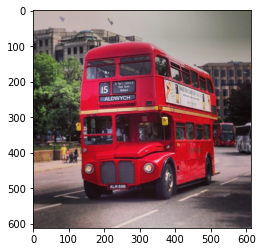

543096832/543085444 [==============================] - 86s 0us/step
--SCENE CATEGORIES:
1 bus_station/indoor
2 highway
3 street
4 promenade
5 parking_garage/outdoor
6 crosswalk
7 bridge
8 viaduct
9 hospital
10 plaza


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import urllib2
from urllib.request import urlopen
import numpy as np
from PIL import Image
from cv2 import resize

from vgg16_places_365 import VGG16_Places365

TEST_IMAGE_URL = 'http://places2.csail.mit.edu/imgs/demo/6.jpg'

# image = Image.open(urlopen(TEST_IMAGE_URL))
image = Image.open('fvqa-images/COCO_val2014_000000001584.jpg')

plt.imshow(image)
plt.show()

image = np.array(image, dtype=np.uint8)
image = resize(image, (224, 224))
image = np.expand_dims(image, 0)



model = VGG16_Places365(weights='places')
predictions_to_return = 10
preds = model.predict(image)[0]
top_preds = np.argsort(preds)[::-1][0:predictions_to_return]

# load the class label
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

print('--SCENE CATEGORIES:')
# output the prediction
for i in range(0, predictions_to_return):
    print(i+1, classes[top_preds[i]])